In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import pandas as pd
from pprint import pprint
from sklearn.decomposition import PCA
import random
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
sns.set_context("talk")

# Data

In [24]:
# cdata = pd.read_csv('../features/features_larger_rock_jazz.csv').dropna()
cdata = pd.read_csv('../features/features_larger_classical_folk.csv').dropna()

# Test and Train Data

In [26]:
X_train, y_train = [], []
X_test, y_test = [], []

#data = cdata.sample(frac=1)

X = cdata[cdata.columns[0:10]]
y = cdata[cdata.columns[10]]

X_train, X_test, y_train, y_test = train_test_split(X, y, )

#for _ in range(0,100):
#X_train, X_test, y_train, y_test = train_test_split(X, y, )

# Random Forest

Accuracy: 0.7450477952513105 (0.05749901266378946)


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


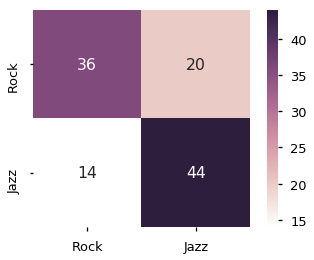

In [18]:
clf = RandomForestClassifier(max_depth=5, max_features=None, random_state=0)    
scores = cross_val_score(clf, X, y, cv=10)

print('Accuracy: {} ({})'.format(scores.mean(), scores.std()))

clf.fit(X_train, y_train)
y_pred_1 = clf.predict(X_test)

clabels = ['Rock', 'Jazz']
#clabels = ['Classical', 'American Folk']

con_1 = confusion_matrix(y_test, y_pred_1, labels=['Rock', 'Jazz'])
    
sns.heatmap(con_1, annot=True, cmap=sns.cubehelix_palette(light=1, as_cmap=True), fmt = ".0f",xticklabels =clabels, yticklabels = clabels)
plt.axes().set_aspect(1. / plt.axes().get_data_ratio())

# AdaBoost

Accuracy: 0.6945205057045944 (0.0691845130571548)


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


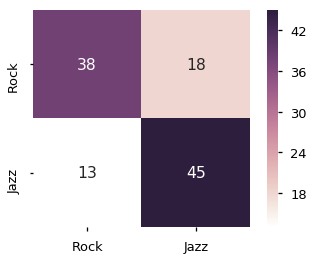

In [19]:
clf = AdaBoostClassifier(random_state=0)
scores = cross_val_score(clf, X, y, cv=10)

print('Accuracy: {} ({})'.format(scores.mean(), scores.std()))

clf.fit(X_train, y_train)
y_pred_1 = clf.predict(X_test)

clabels = ['Rock', 'Jazz']
#clabels = ['Classical', 'American Folk']

con_1 = confusion_matrix(y_test, y_pred_1, labels=['Rock', 'Jazz'])
    
sns.heatmap(con_1, annot=True, cmap=sns.cubehelix_palette(light=1, as_cmap=True), fmt = ".0f",xticklabels =clabels, yticklabels = clabels)
plt.axes().set_aspect(1. / plt.axes().get_data_ratio())

# SVM

Accuracy: 0.6484232706341866 (0.06385187756566506)


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


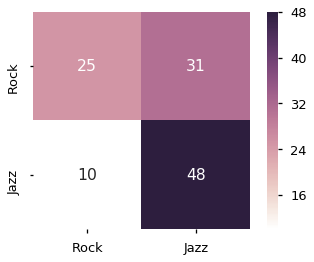

In [20]:
clf = svm.SVC(kernel='rbf', probability=False, random_state=0)

scores = cross_val_score(clf, X, y, cv=10)

print('Accuracy: {} ({})'.format(scores.mean(), scores.std()))

clf.fit(X_train, y_train)
y_pred_1 = clf.predict(X_test)

clabels = ['Rock', 'Jazz']
#clabels = ['Classical', 'American Folk']

con_1 = confusion_matrix(y_test, y_pred_1, labels=['Rock', 'Jazz'])
    
sns.heatmap(con_1, annot=True, cmap=sns.cubehelix_palette(light=1, as_cmap=True), fmt = ".0f",xticklabels =clabels, yticklabels = clabels)
plt.axes().set_aspect(1. / plt.axes().get_data_ratio())

# Neural Network

Accuracy: 0.8125785393472889 (0.027289923784234803)


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


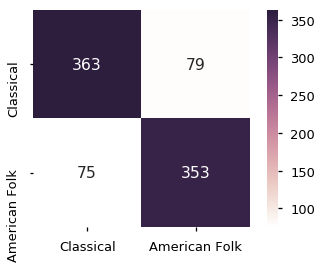

In [27]:
clf = clf = MLPClassifier(solver='lbfgs', activation='tanh', alpha=0.0001, hidden_layer_sizes=(5),\
                              learning_rate_init = 0.001, max_iter=2000, random_state=0)

scores = cross_val_score(clf, X, y, cv=10)

print('Accuracy: {} ({})'.format(scores.mean(), scores.std()))

clf.fit(X_train, y_train)
y_pred_1 = clf.predict(X_test)

# clabels = ['Rock', 'Jazz']
clabels = ['Classical', 'American Folk']

con_1 = confusion_matrix(y_test, y_pred_1, labels=clabels)
    
sns.heatmap(con_1, annot=True, cmap=sns.cubehelix_palette(light=1, as_cmap=True),fmt = ".0f",xticklabels =clabels, yticklabels = clabels)
plt.axes().set_aspect(1. / plt.axes().get_data_ratio())

## Number of Components vs Variation

In [ ]:
pca = PCA()
pca.fit(X)

In [ ]:
print(pca.explained_variance_ratio_ )

In [ ]:
X_p = pca.transform(X)
X_p = np.transpose(X_p)
y_p = np.transpose(y)

#color = {'American Folk': 'red', 'Classical': 'green', 'Rock': 'blue', 'Jazz': 'yellow', 'Pop': 'purple'}
color = {'American Folk': 'red', 'Classical': 'green'}

y_color = [color[i] for i in y_p]

sns.regplot(x=X_p[0], y=X_p[1], fit_reg=False, scatter_kws={"color": y_color})